# Experiment 2: Implement single layer neural network for binary classification

          MADE BY S.R. VIDHYAMBIKA

## 1. Loading the dataset

In [1]:
import pandas as pd

df = pd.read_csv('creditcard.csv', low_memory=False)
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


## 2. Preprocessing

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23858 entries, 0 to 23857
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    23858 non-null  int64  
 1   V1      23858 non-null  float64
 2   V2      23858 non-null  float64
 3   V3      23858 non-null  float64
 4   V4      23858 non-null  float64
 5   V5      23858 non-null  float64
 6   V6      23858 non-null  float64
 7   V7      23858 non-null  float64
 8   V8      23858 non-null  float64
 9   V9      23858 non-null  float64
 10  V10     23858 non-null  float64
 11  V11     23858 non-null  float64
 12  V12     23858 non-null  float64
 13  V13     23858 non-null  float64
 14  V14     23858 non-null  float64
 15  V15     23858 non-null  float64
 16  V16     23858 non-null  float64
 17  V17     23858 non-null  float64
 18  V18     23858 non-null  float64
 19  V19     23858 non-null  float64
 20  V20     23858 non-null  float64
 21  V21     23858 non-null  float64
 22

In [3]:
df = df.convert_dtypes()
print(df.dtypes)

Time        Int64
V1        Float64
V2        Float64
V3        Float64
V4        Float64
V5        Float64
V6        Float64
V7        Float64
V8        Float64
V9        Float64
V10       Float64
V11       Float64
V12       Float64
V13       Float64
V14       Float64
V15       Float64
V16       Float64
V17       Float64
V18       Float64
V19       Float64
V20       Float64
V21       Float64
V22       Float64
V23       Float64
V24       Float64
V25       Float64
V26       Float64
V27       Float64
V28       Float64
Amount    Float64
Class       Int64
dtype: object


In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [5]:
mean = df['V22'].mode().values[0]
df['V22'].fillna(value=mean, inplace=True)
mean = df['V23'].mode().values[0]
df['V23'].fillna(value=mean, inplace=True)
mean = df['V24'].mode().values[0]
df['V24'].fillna(value=mean, inplace=True)
mean = df['V25'].mode().values[0]
df['V25'].fillna(value=mean, inplace=True)
mean = df['V26'].mode().values[0]
df['V26'].fillna(value=mean, inplace=True)
mean = df['V27'].mode().values[0]
df['V27'].fillna(value=mean, inplace=True)
mean = df['V28'].mode().values[0]
df['V28'].fillna(value=mean, inplace=True)
mean = df['Amount'].mode().values[0]
df['Amount'].fillna(value=mean, inplace=True)
mean = df['Class'].mode().values[0]
df['Class'].fillna(value=mean, inplace=True)

In [6]:
df.isnull().sum().sum()

0

## 3. Splitting the data into training and testing & Dropping Time and Class columns

In [7]:
from sklearn.model_selection import train_test_split

x = df.drop(['Time', 'Class'], axis=1)
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

## 4. Building a Binary Classifier

In [8]:
#Create a neural network for binary classification
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=29))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3840      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3969 (15.50 KB)
Trainable params: 3969 (15.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
import numpy as np
x_train = np.asarray(x_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
x_test = np.asarray(x_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

Converting these numpy arrays to np.float32 resolves the ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

## 5. Training and Testing the input data with the binary classifier

In [10]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=100)

Epoch 1/10
191/191 [==============================] - 1s 3ms/step - loss: 0.0996 - accuracy: 0.9913 - val_loss: 0.0315 - val_accuracy: 0.9975
Epoch 2/10
191/191 [==============================] - 0s 2ms/step - loss: 0.0419 - accuracy: 0.9981 - val_loss: 0.0315 - val_accuracy: 0.9985
Epoch 3/10
191/191 [==============================] - 0s 2ms/step - loss: 0.0292 - accuracy: 0.9984 - val_loss: 0.0134 - val_accuracy: 0.9983
Epoch 4/10
191/191 [==============================] - 0s 2ms/step - loss: 0.0123 - accuracy: 0.9982 - val_loss: 0.0089 - val_accuracy: 0.9979
Epoch 5/10
191/191 [==============================] - 0s 2ms/step - loss: 0.0151 - accuracy: 0.9983 - val_loss: 0.0104 - val_accuracy: 0.9979
Epoch 6/10
191/191 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 0.9985 - val_loss: 0.0174 - val_accuracy: 0.9983
Epoch 7/10
191/191 [==============================] - 0s 2ms/step - loss: 0.0225 - accuracy: 0.9984 - val_loss: 0.0192 - val_accuracy: 0.9985
Epoch 

## 6. Plotting the training and validation accuracy using the per-epoch values in the history object (histogram plot)

[]

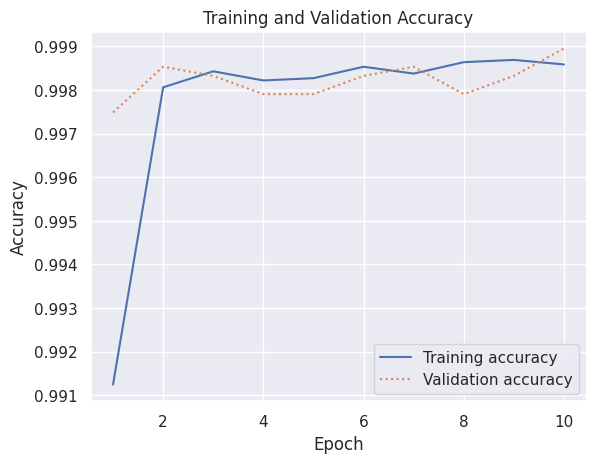

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

## 7. Plotting confusion matrix

150/150 [==============================] - 0s 2ms/step


Text(109.44999999999997, 0.5, 'Actual label')

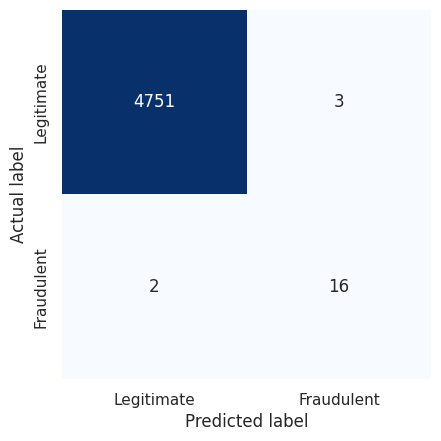

In [12]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['Legitimate', 'Fraudulent']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')